<a href="https://colab.research.google.com/github/SalgadoHUB/image_processing_introduction/blob/main/P3_transformaciones_frecuencias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 3: Transformaciones en el dominio de frecuencias

Vamos a necesitar, fundamentalmente, numpy para hacer las transformadas de Fourier, y Matplotlib y OpenCV para representar.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import cv2 as cv2

## Transformada de fourier en 1D

Antes de trabajar sobre una imagen, vamos a generar una señal en 1D, para entender cómo funciona la transformada de Fourier discreta.

### Señal armónica pura

Generamos una señal armónica sobre un array x (en 1D). La frecuencia de la señal la vamos a medir "franjas por campo". Es decir, el número de periodos que caben en el rango de medida.

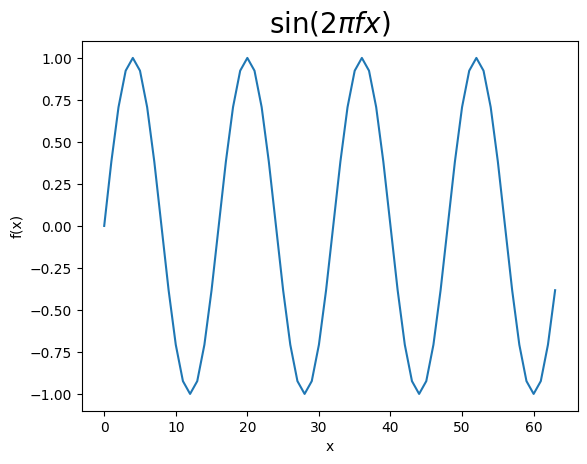

In [ ]:
num_pixeles = 64
x = np.arange(0,num_pixeles,1) # x es un array de píxeles

freq = 4 /num_pixeles
f = np.sin(2*np.pi*x*freq)

plt.plot(x,f)
plt.title(r'$\sin(2\pi f x)$', fontsize=20)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()


Hacemos la Transformada de Fourier mediante el algoritmo Fast Fourier Transform. Está en la librería `fft` de `numpy`.

como nomenclatura, reservamos letras minúsculas para variables en el dominio del espacio, y mayúsculas para las variables en el dominio transformado. De momento sólo nos interesa el valor absoluto de la transformada.

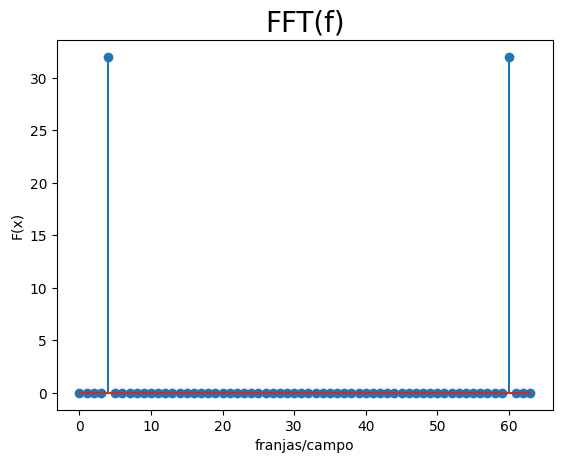

In [ ]:
F = np.abs(np.fft.fft(f))

plt.stem(x,F)
plt.title(r'FFT(f)', fontsize=20)
plt.xlabel('franjas/campo')
plt.ylabel('F(x)')
plt.show()

El algoritmo `FFT` devuelve la transformada "desordenada". Podemos hacer un `fftshift` para representar.

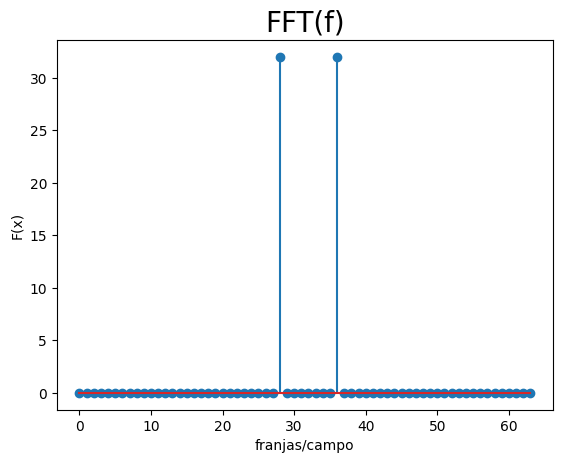

In [ ]:
F = np.fft.fftshift(np.abs(np.fft.fft(f)))

plt.stem(x,F)
plt.title(r'FFT(f)', fontsize=20)
plt.xlabel('franjas/campo')
plt.ylabel('F(x)')
plt.show()

### Suma de frecuencias

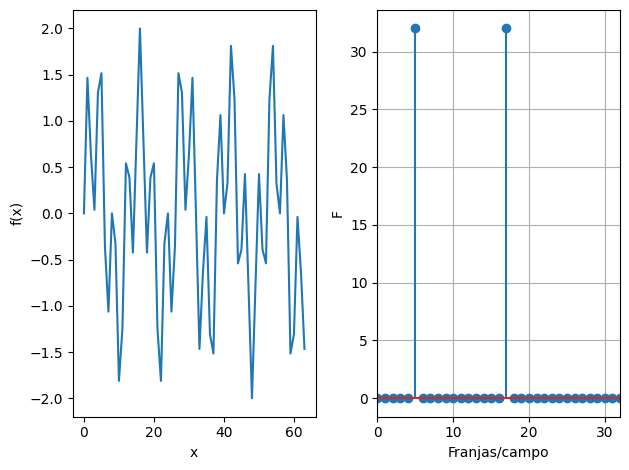

In [ ]:
freq_1 = 5 /num_pixeles
freq_2 = 17 /num_pixeles
f = np.sin(2*np.pi*x*freq_1) + np.sin(2*np.pi*x*freq_2)
F = np.abs(np.fft.fft(f))

fig, axs = plt.subplots(ncols=2, nrows=1, tight_layout=True)
axs[0].plot(x,f)
#axs[0].set_title(r'$\sin(2\pi f_1 x) + \sin(2\pi f_2 x)$', fontsize=20)
axs[0].set_xlabel('x')
axs[0].set_ylabel('f(x)')

axs[1].stem(x,F)
plt.xlim(0, num_pixeles/2)
axs[1].set_xlabel('Franjas/campo')
axs[1].set_ylabel('F')
axs[1].grid()

plt.tight_layout()
plt.show()

### Señal de DC
Añadimos un valor de DC a la señal anterior.

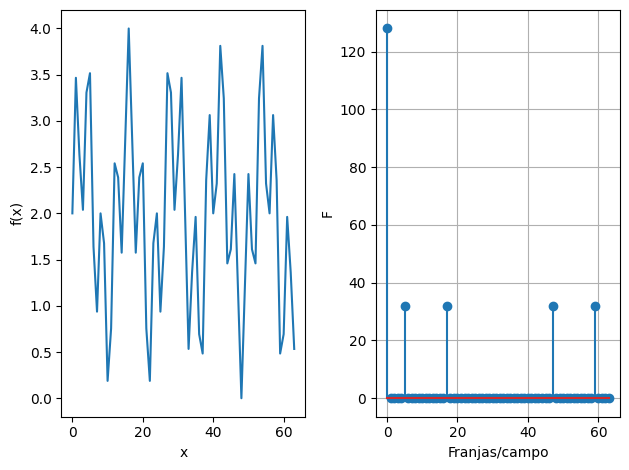

In [ ]:
freq_1 = 5 /num_pixeles
freq_2 = 17 /num_pixeles
DC = 2
f = DC + np.sin(2*np.pi*x*freq_1) + np.sin(2*np.pi*x*freq_2)
F = np.abs(np.fft.fft(f))

fig, axs = plt.subplots(ncols=2, nrows=1, tight_layout=True)
axs[0].plot(x,f)
axs[0].set_xlabel('x')
axs[0].set_ylabel('f(x)')

axs[1].stem(x,F)
#plt.xlim(0, num_pixeles/2)
axs[1].set_xlabel('Franjas/campo')
axs[1].set_ylabel('F')
axs[1].grid()

plt.tight_layout()
plt.show()

## Transformada de Fourier en 2D
Generamos ahora una onda plana sinusoidal en 2D. El dominio espacial es `(x,y)`. Necesitamos unas coordenadas.

In [ ]:
num_pixeles = 64
x_coord = np.arange(0,num_pixeles,1) # x es un array de píxeles
y_coord = np.arange(0,num_pixeles,1) # x es un array de píxeles
# x_coord, y_coord solo definen los ejes coordenados.
# Necesitamos un mapa (2D) de coordenadas

x, y =np.meshgrid(x_coord, y_coord)



Representamos nuestros mapas de coordenadas.

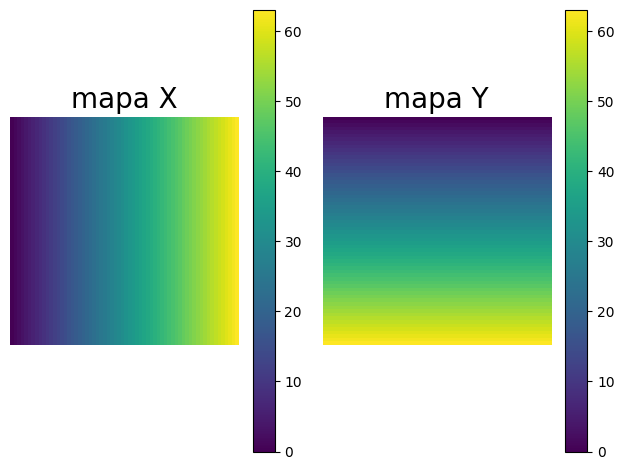

In [ ]:
fig, axs = plt.subplots(ncols=2, nrows=1, tight_layout=True)
pos = axs[0].imshow(x)
axs[0].set_title('mapa X', fontsize=20)
axs[0].axis("off")
fig.colorbar(pos,ax=axs[0])

pos = axs[1].imshow(y)
axs[1].set_title('mapa Y', fontsize=20)
axs[1].axis("off")
fig.colorbar(pos,ax=axs[1])

plt.tight_layout()
plt.show()


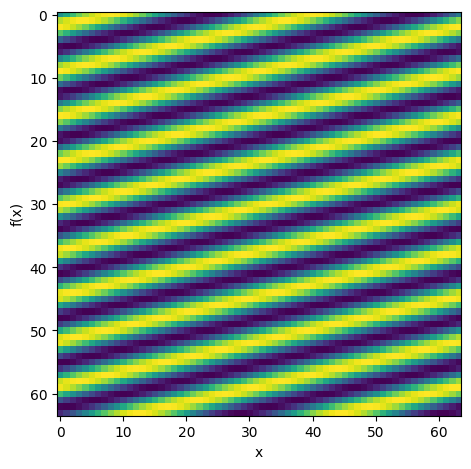

In [ ]:
freq_x = 2 /num_pixeles
freq_y = 9 /num_pixeles
DC = 2
f = DC + np.sin(2*np.pi*x*freq_x + 2*np.pi*y*freq_y)

fig, axs = plt.subplots(ncols=1, nrows=1, tight_layout=True)
axs.imshow(f)
axs.set_xlabel('x')
axs.set_ylabel('f(x)')

plt.tight_layout()
plt.show()

Hacemos su FFT en 2D, y aplicamos un filtro ' log' para representarla correctamente.

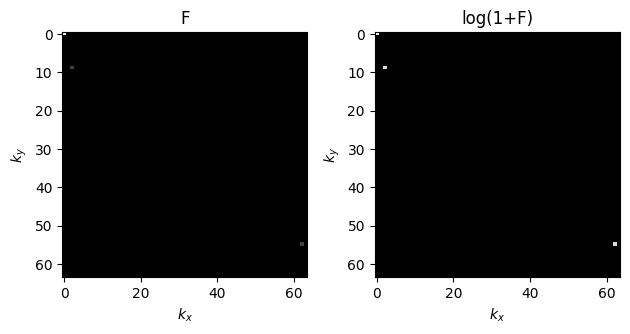

In [ ]:
F = np.abs(np.fft.fft2(f))

fig, axs = plt.subplots(ncols=2, nrows=1, tight_layout=True)
pos = axs[0].imshow(F, cmap='gray');
axs[0].set_title('F')
axs[0].set_xlabel(r'$k_x$')
axs[0].set_ylabel(r'$k_y$')
#fig.colorbar(pos,ax=axs[0])

pos = axs[1].imshow(np.log(1+F), cmap='gray')
axs[1].set_title('log(1+F)')
axs[1].set_xlabel(r'$k_x$')
axs[1].set_ylabel(r'$k_y$')
#fig.colorbar(pos,ax=axs[1])

plt.show()


La función ' fftshift' en 2D reordena por cuadrantes.

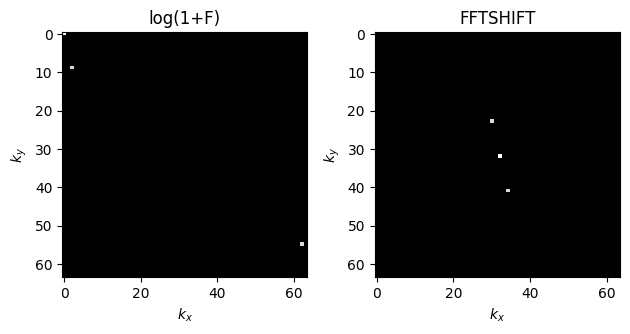

In [ ]:
fig, axs = plt.subplots(ncols=2, nrows=1, tight_layout=True)

pos = axs[0].imshow(np.log(1+F), cmap='gray')
axs[0].set_title('log(1+F)')
axs[0].set_xlabel(r'$k_x$')
axs[0].set_ylabel(r'$k_y$')
#fig.colorbar(pos,ax=axs[0])

pos = axs[1].imshow(np.log(1+np.fft.fftshift(F)), cmap='gray');
axs[1].set_title('FFTSHIFT')
axs[1].set_xlabel(r'$k_x$')
axs[1].set_ylabel(r'$k_y$')
#fig.colorbar(pos,ax=axs[1])

plt.show()

Detalle en torno a las frecuencias centrales:

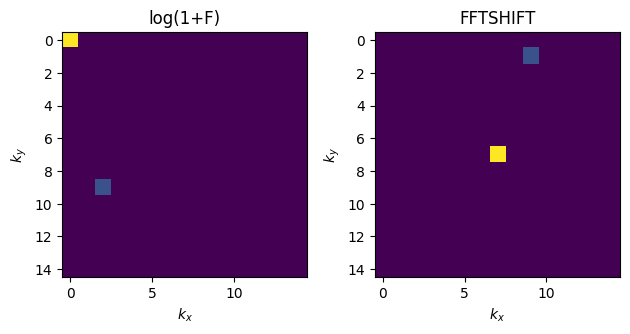

In [ ]:
fig, axs = plt.subplots(ncols=2, nrows=1, tight_layout=True)

Detalle = F[0:15, 0:15]
pos = axs[0].imshow(Detalle) # Representamos sin filtro log
axs[0].set_title('log(1+F)')
axs[0].set_xlabel(r'$k_x$')
axs[0].set_ylabel(r'$k_y$')
#fig.colorbar(pos,ax=axs[0])

pos = axs[1].imshow(np.fft.fftshift(Detalle));
axs[1].set_title('FFTSHIFT')
axs[1].set_xlabel(r'$k_x$')
axs[1].set_ylabel(r'$k_y$')
#fig.colorbar(pos,ax=axs[1])

plt.show()

### Transformada de una imagen
Leemos ahora una imagen para hacer su transformada.

--2024-04-29 16:34:31--  https://testimages.juliaimages.org/stable/thumbnails/Fig0109(e)(surface%20of%20audio%20CD).png
Resolving testimages.juliaimages.org (testimages.juliaimages.org)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to testimages.juliaimages.org (testimages.juliaimages.org)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20980 (20K) [image/png]
Saving to: ‘Fig0109(e)(surface of audio CD).png.1’

Fig0109(e)(surface  100%[===================>]  20.49K  --.-KB/s    in 0s      

2024-04-29 16:34:31 (42.1 MB/s) - ‘Fig0109(e)(surface of audio CD).png.1’ saved [20980/20980]



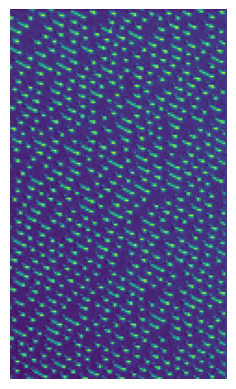

In [ ]:
# Imágenes de ejemplo: https://testimages.juliaimages.org/stable/imagelist_dip3e/
!wget "https://testimages.juliaimages.org/stable/thumbnails/Fig0109(e)(surface%20of%20audio%20CD).png"

g = cv2.imread('Fig0109(e)(surface of audio CD).png',0)
plt.imshow(g)
plt.axis("off")
plt.show()

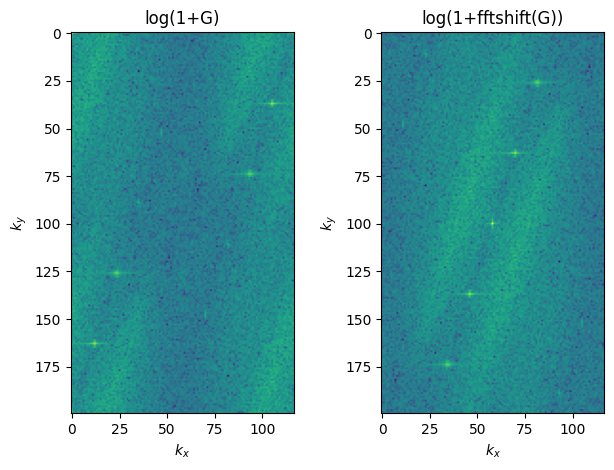

In [ ]:
G = np.abs(np.fft.fft2(g))

fig, axs = plt.subplots(ncols=2, nrows=1, tight_layout=True)
pos = axs[0].imshow(np.log(1+G));
axs[0].set_title('log(1+G)')
axs[0].set_xlabel(r'$k_x$')
axs[0].set_ylabel(r'$k_y$')

pos = axs[1].imshow(np.log(1+np.fft.fftshift(G)))
axs[1].set_title('log(1+fftshift(G))')
axs[1].set_xlabel(r'$k_x$')
axs[1].set_ylabel(r'$k_y$')

plt.show()

## Transformada de Fourier inversa

Mediante `ifft2` podemos volver del dominio transformado al dominio real.

Llamamos `g` a la imagen original, y `f` a la imagen que obtenemos tras volver del dominio transformado

In [ ]:
# Imágenes de ejemplo: https://testimages.juliaimages.org/stable/imagelist_dip3e/
!wget "https://testimages.juliaimages.org/stable/thumbnails/Fig0422(newspaper_shot_woman).png"

--2024-04-29 16:34:32--  https://testimages.juliaimages.org/stable/thumbnails/Fig0422(newspaper_shot_woman).png
Resolving testimages.juliaimages.org (testimages.juliaimages.org)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to testimages.juliaimages.org (testimages.juliaimages.org)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33011 (32K) [image/png]
Saving to: ‘Fig0422(newspaper_shot_woman).png.1’

Fig0422(newspaper_s 100%[===================>]  32.24K  --.-KB/s    in 0s      

2024-04-29 16:34:32 (124 MB/s) - ‘Fig0422(newspaper_shot_woman).png.1’ saved [33011/33011]



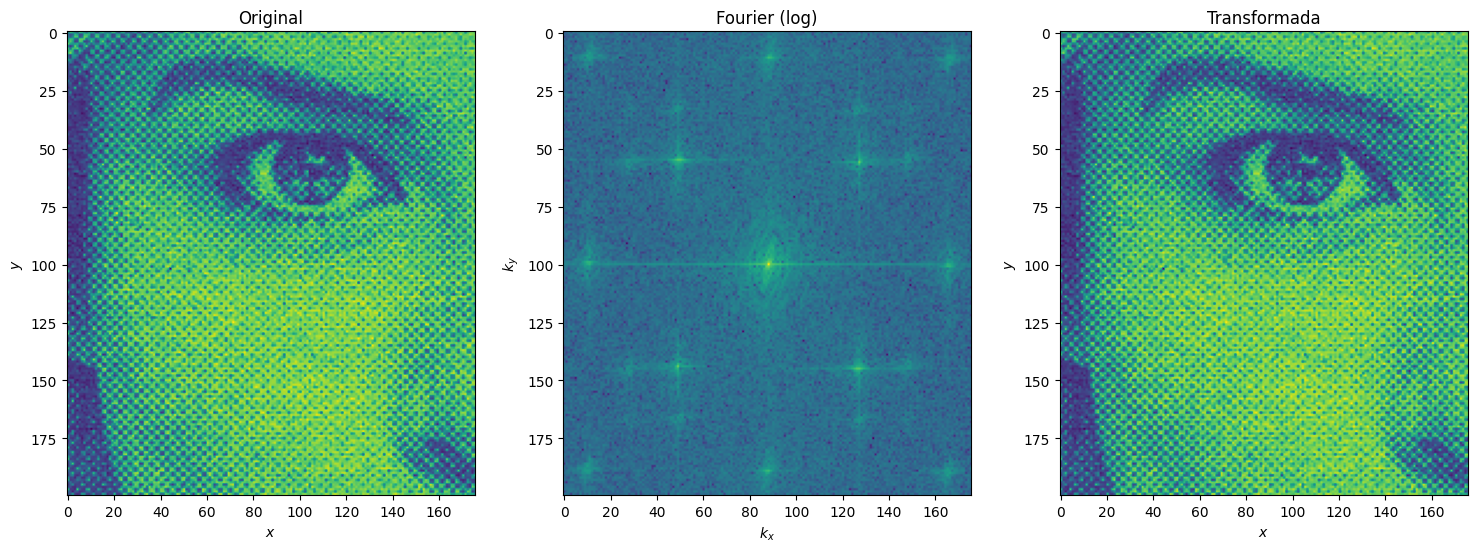

In [ ]:
g = cv2.imread('Fig0422(newspaper_shot_woman).png',0)

G = np.fft.fft2(g) # importante no hacer abs() ahora

f = np.abs(np.fft.ifft2(G)) # volvemos al dominio real. No hace falta fftshift

fig, axs = plt.subplots(figsize=(15,15), ncols=3, nrows=1, tight_layout=True)
pos = axs[0].imshow(g);
axs[0].set_title('Original')
axs[0].set_xlabel(r'$x$')
axs[0].set_ylabel(r'$y$')

pos = axs[1].imshow(np.log(1+np.fft.fftshift(np.abs(G))));
axs[1].set_title('Fourier (log)')
axs[1].set_xlabel(r'$k_x$')
axs[1].set_ylabel(r'$k_y$')

pos = axs[2].imshow(f)
axs[2].set_title('Transformada')
axs[2].set_xlabel(r'$x$')
axs[2].set_ylabel(r'$y$')

plt.show()


## Filtro Pasa Baja

Filtramos las frecuencias altas, dejando pasar solo las frecuencias bajas. Para ello, diseñamos un filtro que aplicamos en el dominio de Fourier.

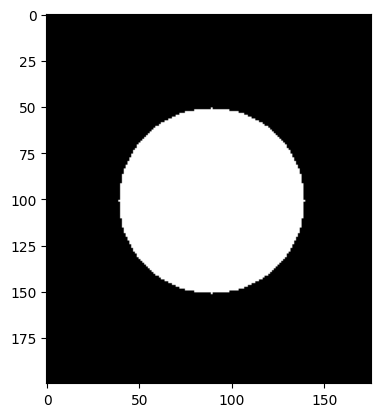

In [ ]:
# Hacemos una máscara circular del mismo tamaño que la imagen
nx, ny = g.shape
H = np.zeros([nx,ny]) #máscara en frecuencias

x0 = np.floor(nx/2)+1
y0 = np.floor(ny/2)+1
radio = 50  # en píxeles

x_coord = np.arange(0,nx,1) #coordenadas
y_coord = np.arange(0,ny,1)
x, y = np.meshgrid(y_coord - y0,x_coord - x0,) #Generamos un mapa de coordenadas.
H[(x**2)+(y**2)<=radio**2] = 1;

plt.imshow(H, cmap='gray')
plt.show()


Aplicamos nuestra máscara en el dominio de Fourier.

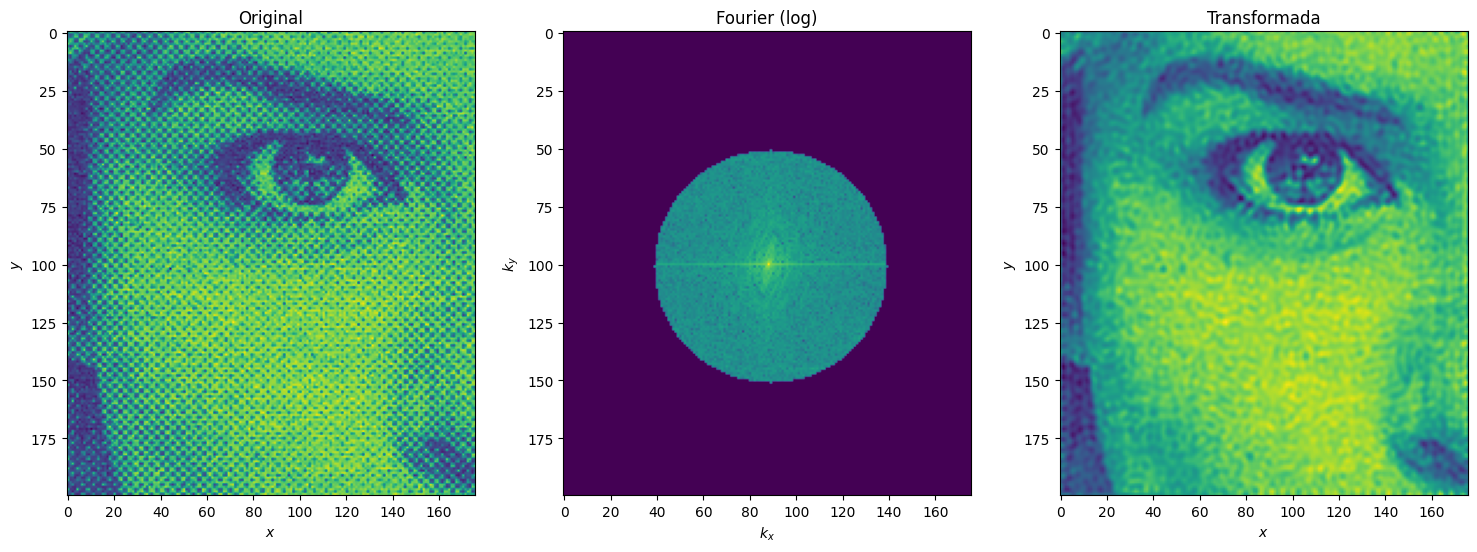

In [ ]:
G = np.fft.fft2(g) # importante no hacer abs() ahora
F = np.fft.fftshift(H) * G # Aplicamos el filtro

f = np.abs(np.fft.ifft2(F)) # Operamos sobre F


fig, axs = plt.subplots(figsize=(15,15), ncols=3, nrows=1, tight_layout=True)
pos = axs[0].imshow(g);
axs[0].set_title('Original')
axs[0].set_xlabel(r'$x$')
axs[0].set_ylabel(r'$y$')

pos = axs[1].imshow(np.log(1+np.fft.fftshift(np.abs(F))))
axs[1].set_title('Fourier (log)')
axs[1].set_xlabel(r'$k_x$')
axs[1].set_ylabel(r'$k_y$')

pos = axs[2].imshow(f)
axs[2].set_title('Transformada')
axs[2].set_xlabel(r'$x$')
axs[2].set_ylabel(r'$y$')

plt.show()

### Filtro Pasa Alta

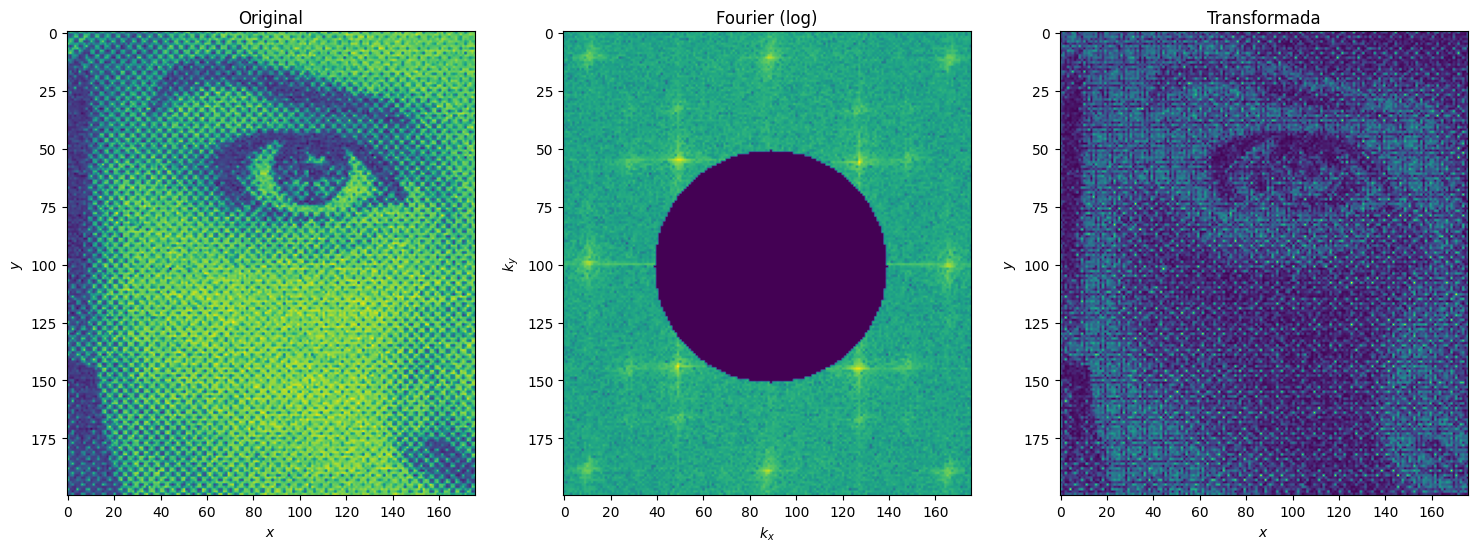

In [ ]:
H = 1 - H
G = np.fft.fft2(g) # importante no hacer abs() ahora
F = np.fft.fftshift(H) * G # Aplicamos el filtro

f = np.abs(np.fft.ifft2(F)) # Operamos sobre F


fig, axs = plt.subplots(figsize=(15,15), ncols=3, nrows=1, tight_layout=True)
pos = axs[0].imshow(g);
axs[0].set_title('Original')
axs[0].set_xlabel(r'$x$')
axs[0].set_ylabel(r'$y$')

pos = axs[1].imshow(np.log(1+np.fft.fftshift(np.abs(F))))
axs[1].set_title('Fourier (log)')
axs[1].set_xlabel(r'$k_x$')
axs[1].set_ylabel(r'$k_y$')

pos = axs[2].imshow(f)
axs[2].set_title('Transformada')
axs[2].set_xlabel(r'$x$')
axs[2].set_ylabel(r'$y$')

plt.show()

### Filtro Pasa Banda

Para trabajar mejor, hacemos una función para hacer máscaras circulares.

In [ ]:
def circulo(radio,nx,ny,x0,y0):
  H = np.zeros([nx,ny]) #máscara en frecuencias
  x_coord = np.arange(0,nx,1) #coordenadas
  y_coord = np.arange(0,ny,1)
  x, y = np.meshgrid(y_coord - y0,x_coord - x0,) #Generamos un mapa de coordenadas.
  H[(x**2)+(y**2)<=radio**2] = 1;
  return H


Podemos centrar nuestra máscara en cualquier frecuencia determinada, y también podemos combinar varias máscaras.

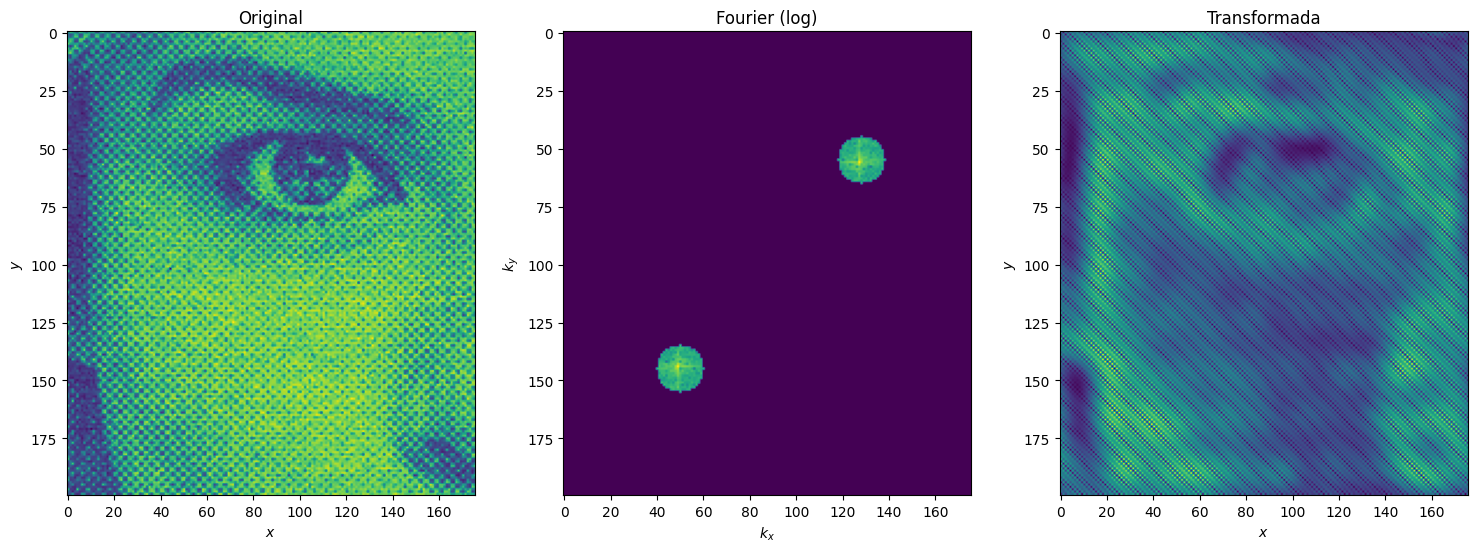

In [ ]:
nx, ny = g.shape
#x0 = 55
#y0 = 128
radio = 10  # en píxeles
H = circulo(radio,nx,ny,55,128) + circulo(radio,nx,ny,145,50)

G = np.fft.fft2(g) # importante no hacer abs() ahora
F = np.fft.fftshift(H) * G # Aplicamos el filtro

f = np.abs(np.fft.ifft2(F)) # Operamos sobre F


fig, axs = plt.subplots(figsize=(15,15), ncols=3, nrows=1, tight_layout=True)
pos = axs[0].imshow(g);
axs[0].set_title('Original')
axs[0].set_xlabel(r'$x$')
axs[0].set_ylabel(r'$y$')

pos = axs[1].imshow(np.log(1+np.fft.fftshift(np.abs(F))))
axs[1].set_title('Fourier (log)')
axs[1].set_xlabel(r'$k_x$')
axs[1].set_ylabel(r'$k_y$')

pos = axs[2].imshow(f)
axs[2].set_title('Transformada')
axs[2].set_xlabel(r'$x$')
axs[2].set_ylabel(r'$y$')

plt.show()

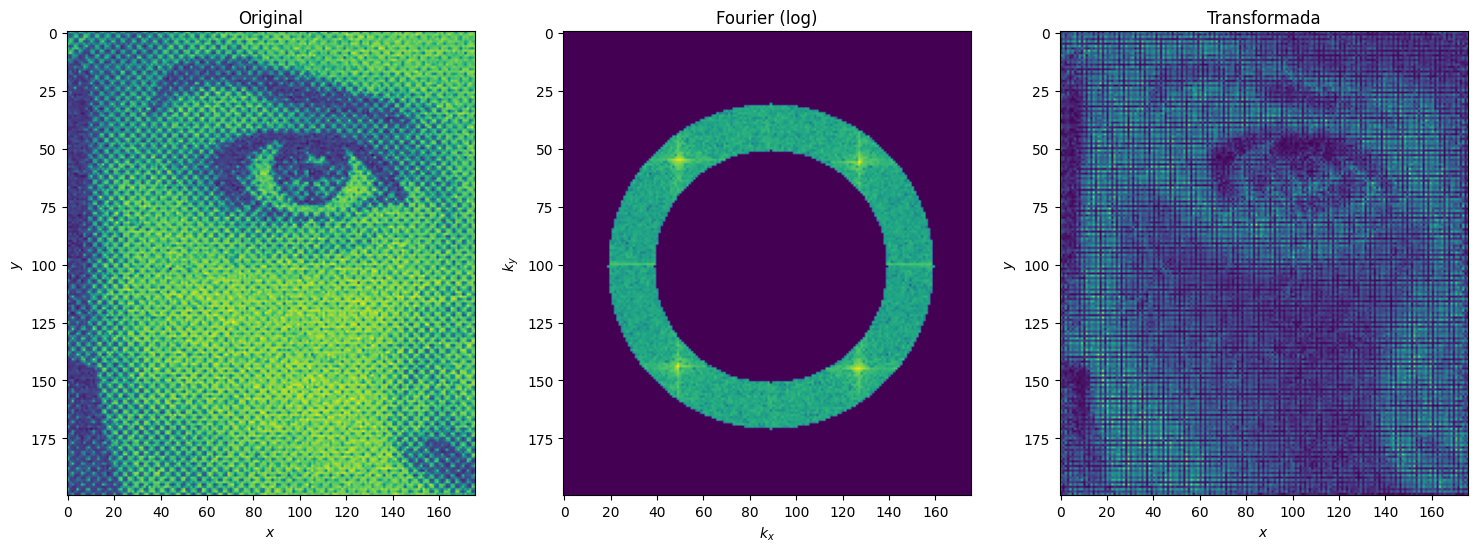

In [ ]:
nx, ny = g.shape

radio_ext = 70  # en píxeles
radio_int = 50

x0 = np.floor(nx/2)+1
y0 = np.floor(ny/2)+1
H = circulo(radio_ext,nx,ny,x0,y0) - circulo(radio_int,nx,ny,x0,y0)

G = np.fft.fft2(g) # importante no hacer abs() ahora
F = np.fft.fftshift(H) * G # Aplicamos el filtro

f = np.abs(np.fft.ifft2(F)) # Operamos sobre F


fig, axs = plt.subplots(figsize=(15,15), ncols=3, nrows=1, tight_layout=True)
pos = axs[0].imshow(g);
axs[0].set_title('Original')
axs[0].set_xlabel(r'$x$')
axs[0].set_ylabel(r'$y$')

pos = axs[1].imshow(np.log(1+np.fft.fftshift(np.abs(F))))
axs[1].set_title('Fourier (log)')
axs[1].set_xlabel(r'$k_x$')
axs[1].set_ylabel(r'$k_y$')

pos = axs[2].imshow(f)
axs[2].set_title('Transformada')
axs[2].set_xlabel(r'$x$')
axs[2].set_ylabel(r'$y$')

plt.show()